<a href="https://colab.research.google.com/github/Avik-G/EDA-Play-Store-Review-Analysis-/blob/main/Capstone_Project_1_Play_Store_App_Review_Analysis_Team_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

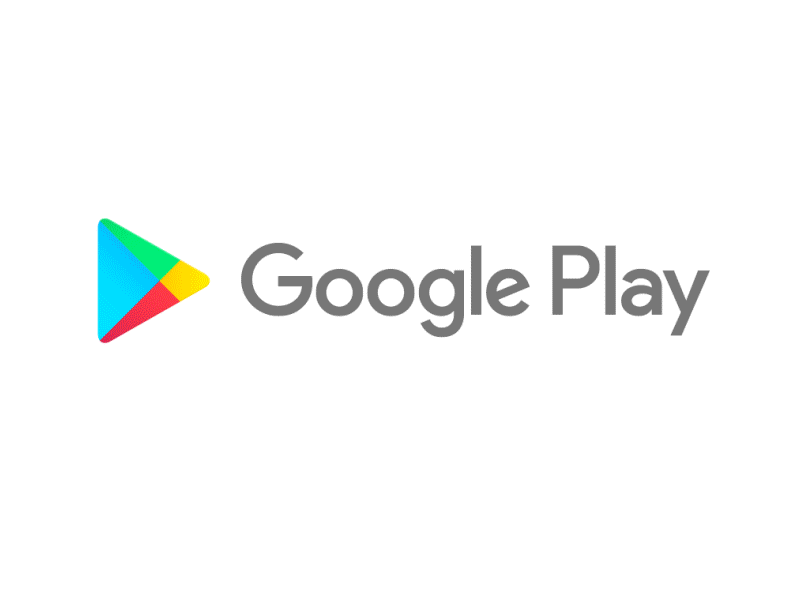

#⭕Introduction:

With the help of Python, we will perform an Exploratory Data Analysis on data from Google Play Store.

Google Play Store through the utilization of the ever-increasing reach of the internet and accessibility through smartphones has created a lucrative market for apps on a global scale. The wide range of functionalities and ease of developing basic use applications promotes a competitive market space where developers launch, update and modify their applications based on user experience and valuable feedback. Many applications do not survive and are taken down. At the end of Q’4 of 2021, the number of apps available in the Google Play Store was 4.67 million which fell to 3.29 million in Q’1 of 2022 and has steadily increased to 3.55 million by Q’4 of 2022. It is thus crucial to quantify the parameters to understand the performance of an app.


Here, we will look at a subset of the whole Google Play Store, approximately ten thousand apps across different categories and perform a comprehensive analysis to look for insights and understand the driving forces for growth and retention.

The data consists of the following two files: -
* Playstore Data.csv : Contains 13 features to define an individual app.
* User Reviews.csv: Contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.






## ❄ What is EDA (Exploratory Data Analysis)?

EDA is the most basic form of analysis that needs to be done to understand the basic relationship between different data points in the data set. It usees statistical summaries and graphical representations to discover trends, patterns, or to check assumptions.

## ❇Steps involved in EDA
* Developing a Problem Statement: The Problem Statement allows us to make random assumptions on the data and test to check if they hold any importance.
* Cleaning Dataset: The data present needs to be checked for inconsistencies like null values, incorrect dtypes, duplicates, etc and are to be dealt with accordingly.
* Univariate Analysis: Calculating univariate analysis means calculating the mean of the column, standard deviation, range, min, max, and also the quantiles and IQR=(Q3-Q2). This also helps us identify outliers and anomalies.
* Bivariate Analysis:It is performed to find the relationship between each variable in the dataset and the target variable of interest (or) using 2 variables and finding the relationship between them.
* Multivariate Analysis: It is performed to understand interactions between different fields in the dataset (or) finding interactions between variables more than 2.

## Problem Statements:

Play Store Data
* What is the correlation between different features?
* What is the distribution of Ratings?
* What is the average rating of Apps?
* What is the relationship between all features in the dataframe?
* How does Size of an App effect its Rating?
* How does Size of an App effect its Rating in each category?
* How does Price of an App effect its Rating?
* Which categories have large sized apps?
* What are the top content rating values?
* What are the Top Categories on Play Store?
* How does count of apps vary by category?
* Which category has maximum number of Installs?
* What are the top 10 genres with maximum number of Apps?
* Which Apps have maximum reviews?
* What are the top 10 Apps in any category?
* What is the Ratio of Free to Paid Apps?
* What are the top 10 Free Apps?
* In which categories do the top 20 free apps belong to?
* What is the case for Paid Apps?
* What are the top 10 Paid Apps?
* In which categories do the top 10 paid apps belong to?
* What are the Top Apps based on Revenue generated?
* What is the App pricing trend across popular categories?
* What is the Rating difference between Paid and Free Apps?

User Review Data

* What is the percentage distribution of Review Sentiments?
* What are the top 10 Positively reviewed Apps?
* What are the top 10 Negatively reviewed Apps?
* What are the top 10 Neutrally reviewed Apps?
* How is the Sentiment Subjectivity distributed?
* Is Sentiment Subjectivity proportional to Sentiment Polarity?

Merged Data

* Fraction of Sentiment Polarity based on Category
* How does Sentiment Polarity change based on Free v/s Paid Apps?
* What is the correlation between features of the merged dataframe?


# **Exploring the Play Store Data**

First Step of our analysis is to understand what types of data we have, the quantity of data, etc. to further develop insights.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "/content/drive/MyDrive/DS/EDA/Data/"

Play_Store_df = pd.read_csv(path + 'Copy of Play Store Data.csv')
User_Review_df = pd.read_csv(path + 'Copy of User Reviews.csv')

Checking for Data Types and Format of Dataframe

In [ ]:
Play_Store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
Play_Store_df.shape

(10841, 13)

Let us first define what information the columns contain based on our inspection.

The Play Store[Play_Store_df] dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

- App - It tells us about the name of the application with a short description (optional).
- Category - It gives the category to the app.
- Rating - It contains the average rating the respective app received from its users.
- Reviews - It tells us about the total number of users who have given a review for the application.
- Size - It tells us about the size being occupied the application on the mobile phone.
- Installs - It tells us about the total number of installs/downloads for an application.
- Type - IIt states whether an app is free to use or paid.
- Price - It gives the price payable to install the app. For free type apps, the price is zero.
- Content Rating - It states whether or not an app is suitable for all age groups or not.
- Genres - It tells us about the various other categories to which an application can belong.
- Last Updated - It tells us about the when the application was updated.
- Current Ver - It tells us about the current version of the application.
- Android Ver - It tells us about the android version which can support the application on its platform.

# **Data Cleaning**
In the process of EDA, we work with mostly columns and we need to remove any unwanted elements from the data, be it null values, duplicates, strings in data and unusable dtypes.

## **Handling NaN Values**
 Calculating total Null Values in Play Store Data

In [ ]:
def playstoreinfo():
  temp=pd.DataFrame(index = Play_Store_df.columns)
  temp["datatype"] = Play_Store_df.dtypes
  temp["not null values"] = Play_Store_df.count()
  temp["null value"] = Play_Store_df.isnull().sum()
  temp["% of the null value"] = Play_Store_df.isnull().mean()
  temp["unique count"] = Play_Store_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


The columns of Rating, Type, Content Rating, Current Ver and Android Ver have Null Values out of which only the Rating Null Values are a significant portion of the Data Set. Thus we can drop the null values rows from all columns except Rating

Removing Null Values from PS_df except Ratings Column

In [ ]:
Play_Store_df = Play_Store_df[Play_Store_df['Android Ver'].notna()]
Play_Store_df = Play_Store_df[Play_Store_df['Content Rating'].notna()]
Play_Store_df = Play_Store_df[Play_Store_df['Current Ver'].notna()]
Play_Store_df = Play_Store_df[Play_Store_df['Type'].notna()]

In [ ]:
# Checking if the above function was successful
def playstoreinfo():
  temp=pd.DataFrame(index = Play_Store_df.columns)
  temp["datatype"] = Play_Store_df.dtypes
  temp["not null values"] = Play_Store_df.count()
  temp["null value"] = Play_Store_df.isnull().sum()
  temp["% of the null value"] = Play_Store_df.isnull().mean()
  temp["unique count"] = Play_Store_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10829,0,0.000000,9648
Category,object,10829,0,0.000000,33
Rating,float64,9360,1469,0.135654,39
Reviews,object,10829,0,0.000000,5999
Size,object,10829,0,0.000000,457
Installs,object,10829,0,0.000000,20
Type,object,10829,0,0.000000,2
Price,object,10829,0,0.000000,92
Content Rating,object,10829,0,0.000000,6
Genres,object,10829,0,0.000000,119


13.5% of values in Rating Column is missing

In [ ]:
# Checking for any outliers in Rating Column
Play_Store_df[Play_Store_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no outlier in Rating Column

**Working with the Rating Data:** In order to find a suitable value to replace the Null Values, some exploratory plots are done.

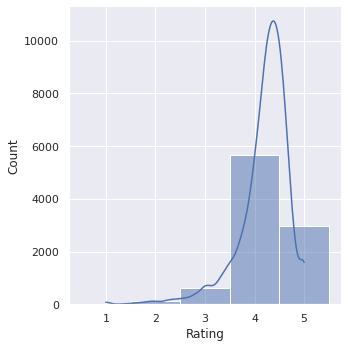

In [ ]:
# Distribution of Data in Rating Column
Review_data = Play_Store_df["Rating"]
sns.set(rc = {'figure.figsize':(12,7)})
sns.displot(Review_data, discrete = True, kde = True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


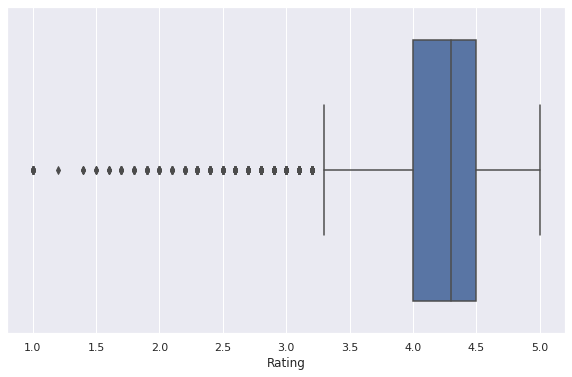

In [ ]:
# Box Plot of Data in Rating Column
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(Review_data)

In [ ]:
# Skewness of Rating Data
Play_Store_df['Rating'].skew()

-1.8501346146929738

As observed from the above plots and subsequent Skew readings, the data is higly left skewed.



Thus the missing values should be replaced with Median or Mode and not Mean values.

In [ ]:
# Finding Meadian & Mode Values of Rating Column
Play_Store_df_rating_median = Play_Store_df["Rating"].median()
print('Median Value of Rating Data: ' ,Play_Store_df_rating_median)
Play_Store_df_rating_mode = Play_Store_df["Rating"].mode()
print('Mode Value of Rating Data: ', Play_Store_df_rating_mode)

Median Value of Rating Data:  4.3
Mode Value of Rating Data:  0    4.4
dtype: float64


As the values of Median and Mode are differentiatied by a value of 0.1, any one of them can be used. 

We select **Median Value** to replace missing values in Rating Column

In [ ]:
Play_Store_df["Rating"].fillna(value = Play_Store_df_rating_median, inplace = True)

In [ ]:
Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


There are no Null Values in the Data Set

# **Handling Duplicate Values**

Checking for unique counts of App Names

In [ ]:
Play_Store_df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9648, dtype: int64

In [ ]:
Play_Store_df[Play_Store_df['App']== 'ESPN']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2959,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3010,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3018,ESPN,SPORTS,4.2,521138,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3048,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3060,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
3072,ESPN,SPORTS,4.2,521140,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up
4069,ESPN,SPORTS,4.2,521081,Varies with device,"10,000,000+",Free,0,Everyone 10+,Sports,"July 19, 2018",Varies with device,5.0 and up


It is observed that some Apps like ESPN, ROBLOX, Candy Crush Saga, etc have multiple entries with subsequent same data in all rows.

These duplicated need to be removed

In [ ]:
Play_Store_df.drop_duplicates(subset= 'App', inplace = True)

In [ ]:
Play_Store_df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
KineMaster – Pro Video Editor                     1
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9648, dtype: int64

There are no duplicates in the data set.

# **Data Manipulation**

 It is required to convert other columns from dtype ***Object*** to ***Integer*** or **Float**, as to further develop meaningful insights to the data

1. Changing Price from String to Float.

In attempts to change the dtype directly, a '$' string has restricted from using astype functions to change the dtype. Thus a function is to be created to complete the process

In [ ]:
def dollar_to_float(p):
  if '$' in p:
    return float(p[1:])
  else:
    return float(p)

In [ ]:
Play_Store_df['Price'] = Play_Store_df['Price'].apply(lambda x: dollar_to_float(x))

Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


Price colum has dtype Float64

Similarly; Reviews, Size & Installs Columns also need to be converted to usable dtypes

In [ ]:
#Convert Reviews to INT

Play_Store_df['Reviews'] = Play_Store_df['Reviews'].astype(int)
Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


Reviews are succesfully converted to Integer Type.

In [ ]:
# Convert Installs to INT

def remove_and_convert(I):
  if '+' and ',' in I:
    new_value = int(I[:-1].replace(',',''))
    return new_value
  elif '+' in I:
    new_val = int(I[:-1])
    return new_val
  else:
    return int(I)

Play_Store_df['Installs'] = Play_Store_df['Installs'].apply(lambda x: remove_and_convert(x))

Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [ ]:
# Convert Size to Float [1 MB has 1024 KB thus 1 KB =1/1024 MB]

def KB_to_MB_converter(S):
  try:
    if 'M' in S:
      return float(S[:-1])
    elif 'k' in S:
      return round(float(S[:-1])/1024, 4)
    else:
      return S
  except:
    return S


Play_Store_df['Size'] = Play_Store_df['Size'].apply(lambda x: KB_to_MB_converter(x))
Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


Even after defining a function, the Size column still shows dtype as Object and not Float

A possible explanation could be existence of string objects in the Column data other than 'M' or 'k'. The strings 'Varies with device' is replaced with 'NaN' and the column is converted to a float.

In [ ]:
Play_Store_df['Size'] = Play_Store_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
Play_Store_df['Size'] = Play_Store_df['Size'].apply(lambda x: float(x))

In [ ]:
Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   int64  
 4   Size            8422 non-null   float64
 5   Installs        9648 non-null   int64  
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   float64
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [ ]:
def playstoreinfo():
  temp=pd.DataFrame(index = Play_Store_df.columns)
  temp["datatype"] = Play_Store_df.dtypes
  temp["not null values"] = Play_Store_df.count()
  temp["null value"] = Play_Store_df.isnull().sum()
  temp["% of the null value"] = Play_Store_df.isnull().mean()
  temp["unique count"] = Play_Store_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,9648,0,0.000000,9648
Category,object,9648,0,0.000000,33
Rating,float64,9648,0,0.000000,39
Reviews,int64,9648,0,0.000000,5328
Size,float64,8422,1226,0.127073,455
Installs,int64,9648,0,0.000000,20
Type,object,9648,0,0.000000,2
Price,float64,9648,0,0.000000,92
Content Rating,object,9648,0,0.000000,6
Genres,object,9648,0,0.000000,118


As suspected, there are new null values in Size Column which need to be replaced as 12% of total data is a significant number.

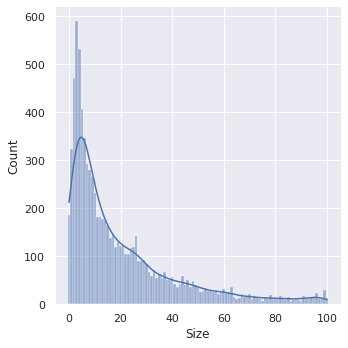

In [ ]:
# Distribution of Size Data
Size_data = Play_Store_df["Size"]
sns.set(rc = {'figure.figsize':(20,10)})
sns.displot(Size_data, discrete = True, kde = True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


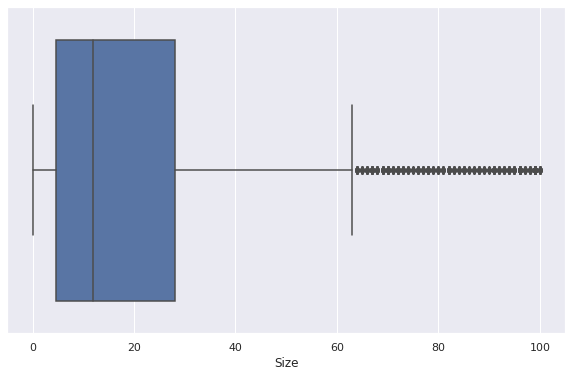

In [ ]:
# Box Plot of Size Data
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(Size_data)

In [ ]:
# Skew of Size Data
Play_Store_df['Size'].skew()

1.6444319074719538

Again replacing Null Values in Size Data with Median values

In [ ]:
# Finding Meadian & Mode Values of Size Column and Replacing with Median
Play_Store_df_Size_median = Play_Store_df["Size"].median()
print('Median Value of Size Data: ' ,Play_Store_df_Size_median)
Play_Store_df_Size_mode = Play_Store_df["Size"].mode()
print('Mode Value of Size Data: ', Play_Store_df_Size_mode)

Play_Store_df["Size"].fillna(value = Play_Store_df_Size_median, inplace = True)

Median Value of Size Data:  12.0
Mode Value of Size Data:  0    11.0
1    12.0
dtype: float64


In [ ]:
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,9648,0,0.0,9648
Category,object,9648,0,0.0,33
Rating,float64,9648,0,0.0,39
Reviews,int64,9648,0,0.0,5328
Size,float64,9648,0,0.0,455
Installs,int64,9648,0,0.0,20
Type,object,9648,0,0.0,2
Price,float64,9648,0,0.0,92
Content Rating,object,9648,0,0.0,6
Genres,object,9648,0,0.0,118


In [ ]:
# Converting Last Update to DateTime Format
Play_Store_df["Last Update"]=pd.to_datetime(Play_Store_df['Last Updated']) 

In [ ]:
Play_Store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9648 non-null   object        
 1   Category        9648 non-null   object        
 2   Rating          9648 non-null   float64       
 3   Reviews         9648 non-null   int64         
 4   Size            9648 non-null   float64       
 5   Installs        9648 non-null   int64         
 6   Type            9648 non-null   object        
 7   Price           9648 non-null   float64       
 8   Content Rating  9648 non-null   object        
 9   Genres          9648 non-null   object        
 10  Last Updated    9648 non-null   object        
 11  Current Ver     9648 non-null   object        
 12  Android Ver     9648 non-null   object        
 13  Last Update     9648 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
m

# **Exploratory Analysis**

## Correlation between different features

Now, as there are no Null values, Duplicate Values or Unsuable Data Types in the entire data, we can begin analysis.

First we will check the correlation between the 5 numerical features in the Play Store Dataset.

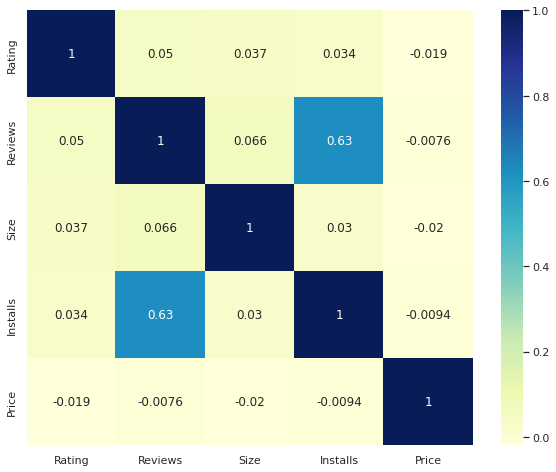

In [ ]:
# Correlation Heat Map
corr_data = Play_Store_df.corr(method = 'pearson')
plt.figure(figsize = (10,8))
dataplot = sns.heatmap(corr_data, cmap="YlGnBu", annot=True)
plt.show()

- There is a positive correlation between the Reviews and Installs column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
- The Price is slightly negatively correlated with the Rating, Reviews, and Installs. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
- The Rating is slightly positively correlated with the Installs and Reviews column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

## Distribution of Ratings.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


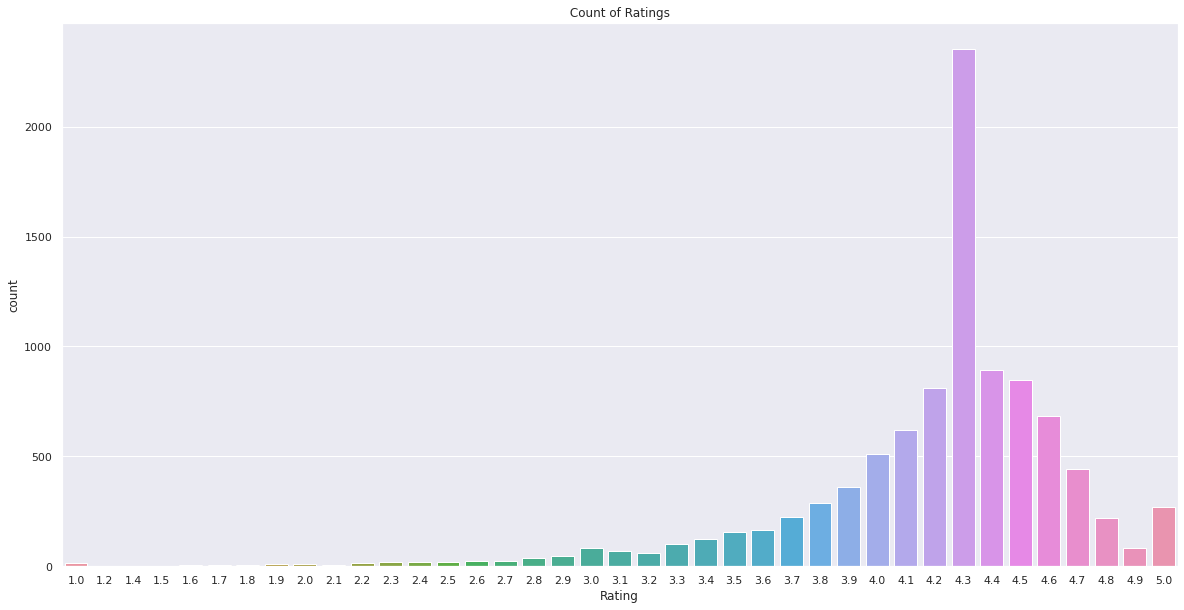

In [ ]:
# Distribution Plot of Ratings Column
rt_plot = sns.countplot(Play_Store_df['Rating'])
sns.set(rc={'figure.figsize':(10,20)})
plt.title(" Count of Ratings ")
plt.show()

From the above plot we can conclude that the most apps are rated between 4 and 5.

There are also some apps , those are rated less than 3.
Maximun number of apps are rated between 4.1 and 4.5.

## Average Rating of Apps

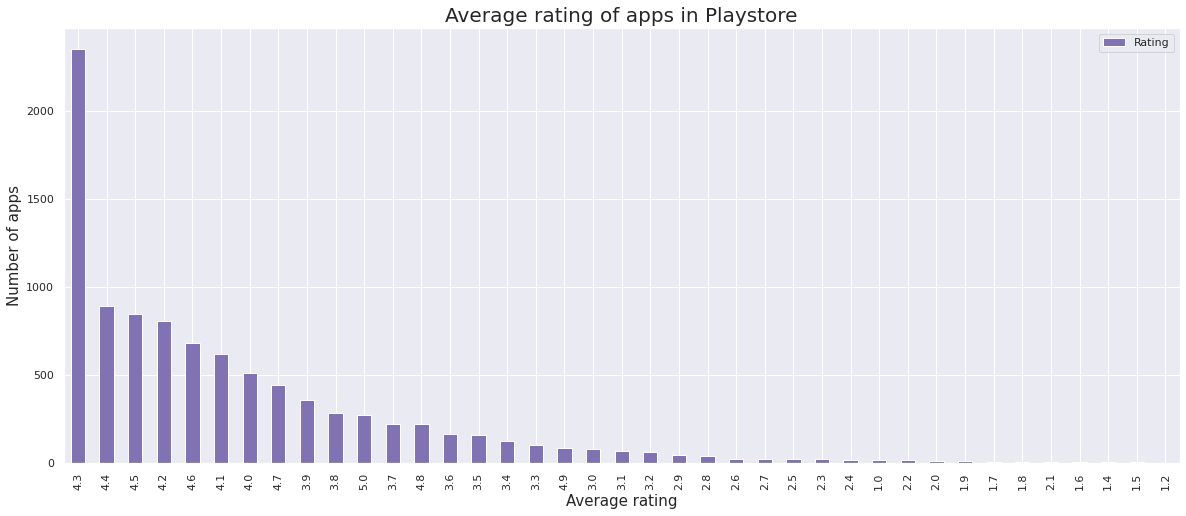

In [ ]:
# Average App Ratings

Play_Store_df['Rating'].value_counts().plot.bar(figsize=(20,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 20)
plt.legend()

The spread of Ratings isfrom 1.0 to 5.0 but it is better to categorise them into the following classes:
- Top Rated for Apps with Rating greater than 4.0
- Above Average for Apps with Rating greater than 3.0 and less than 4.0
- Average for Apps with Rating greater than 2.0 and less than 3.0
- Below Average for Apps with Rating less than 2.0

In [ ]:
# Create a function to Categorise apps based on rating range
def Rate_method(Rating):
  if Rating >= 4:
    return "Top Rated"
  elif Rating >= 3 and Rating < 4:
    return "Above Average"
  elif Rating >= 2 and Rating < 3:
    return "Average"
  else:
    return "Below Average" 

In [ ]:
Play_Store_df["Rating_Range"] = Play_Store_df['Rating'].apply(lambda x: Rate_method(x))

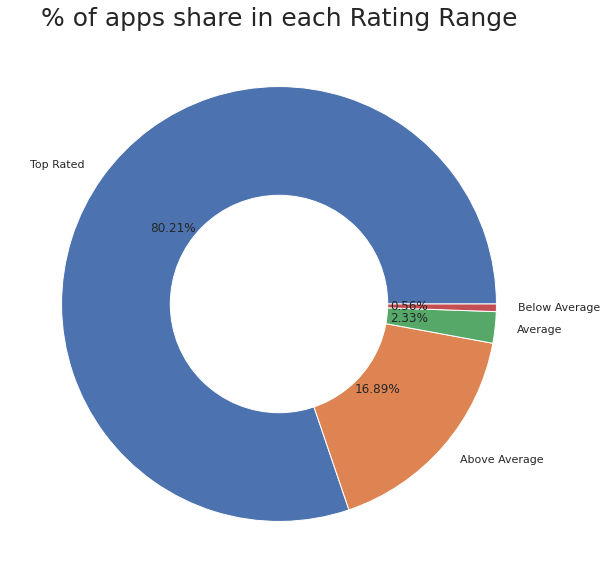

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(Play_Store_df.Rating_Range.value_counts(), labels=Play_Store_df.Rating_Range.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Rating Range', fontsize = 25)
plt.show()

The overall result shows most apps are Top Rated, specifically:
- 80.21 % TOP RATED
- 16.89 % ABOVE AVERAGE
- 2.33 % AVERAGE
- 0.56 % BELOW AVERAGE

## Cross functional relationship between features of Dataframe

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Pairwise Plot - Rating, Size, Installs, Reviews, Price')

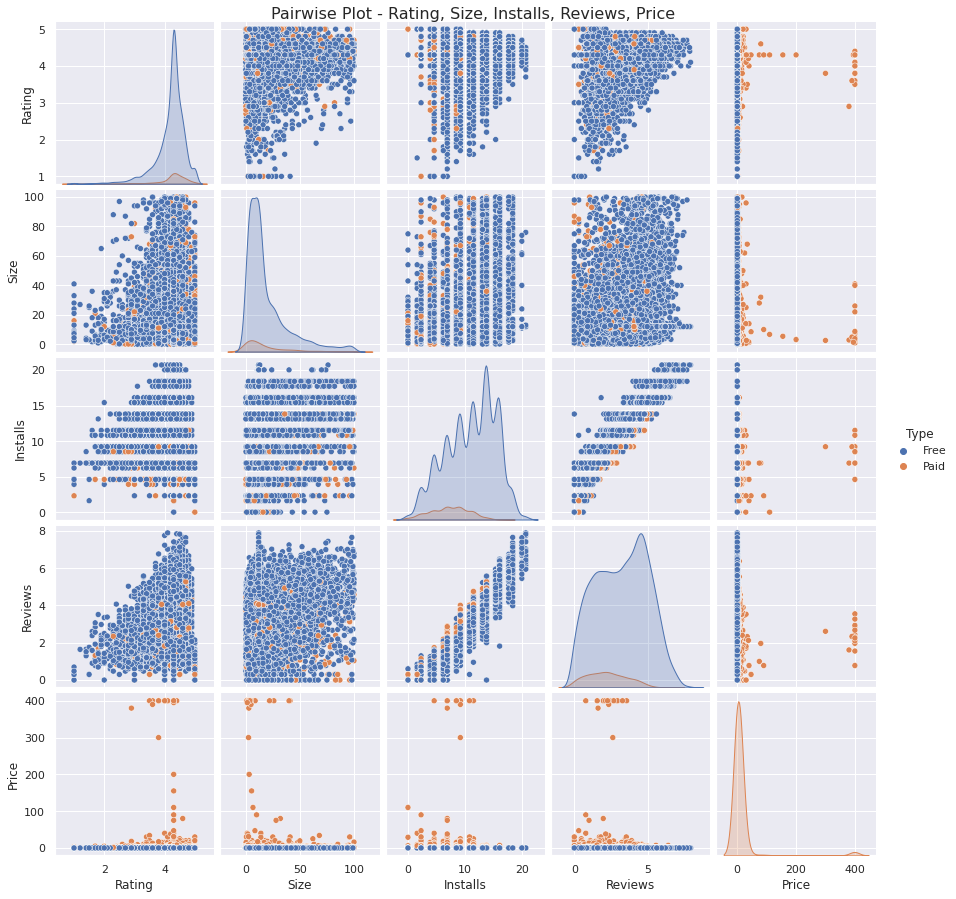

In [ ]:
# Pair Plot of all variables
Rating = Play_Store_df['Rating']
Size = Play_Store_df['Size']
Installs = Play_Store_df['Installs']
Reviews = Play_Store_df['Reviews']
Type = Play_Store_df['Type']
Price = Play_Store_df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(Rating, Size, np.log(Installs), np.log10(Reviews), Price, Type)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Price','Type']), hue='Type')
p.fig.suptitle("Pairwise Plot - Rating, Size, Installs, Reviews, Price",x=0.5, y=1.0, fontsize=16)

From the Pair Plot we can visualize any possible patterns among the data pairs. As seen in the correlation plot there is a visible relation between Installs and Reviews. Also for Paid apps, there are some patterns for the Reviews to Price and also for Installs to Price but the outcomes are difficult to analyse and determine any trend.

Some inferences are as follows:
- Most of the App are Free.
- Most of the Paid Apps have Rating around 4
- As the number of installation increases the number of reviews of the particaular app also increases.

## Size v/s Rating

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.02, 'Rating vs Size of Apps')

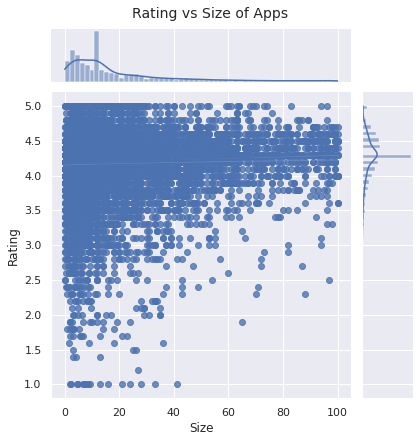

In [ ]:
# Relation between Rating & Size
sns.set_style("darkgrid")
ax = sns.jointplot(Play_Store_df['Size'], Play_Store_df['Rating'], kind="reg")
ax.fig.suptitle("Rating vs Size of Apps", y = 1.02, fontsize=14 )

- The apps at the lower size range are rated distributively. 
- They also contribute to the lowest rated app while the apps of greater size range are rated better as compared to the apps of small size range. 
- The frequency of the small apps is also way too high than the apps with large size. 
-The maximum number of apps is around 20000 in size

## Size v/s Rating for each category

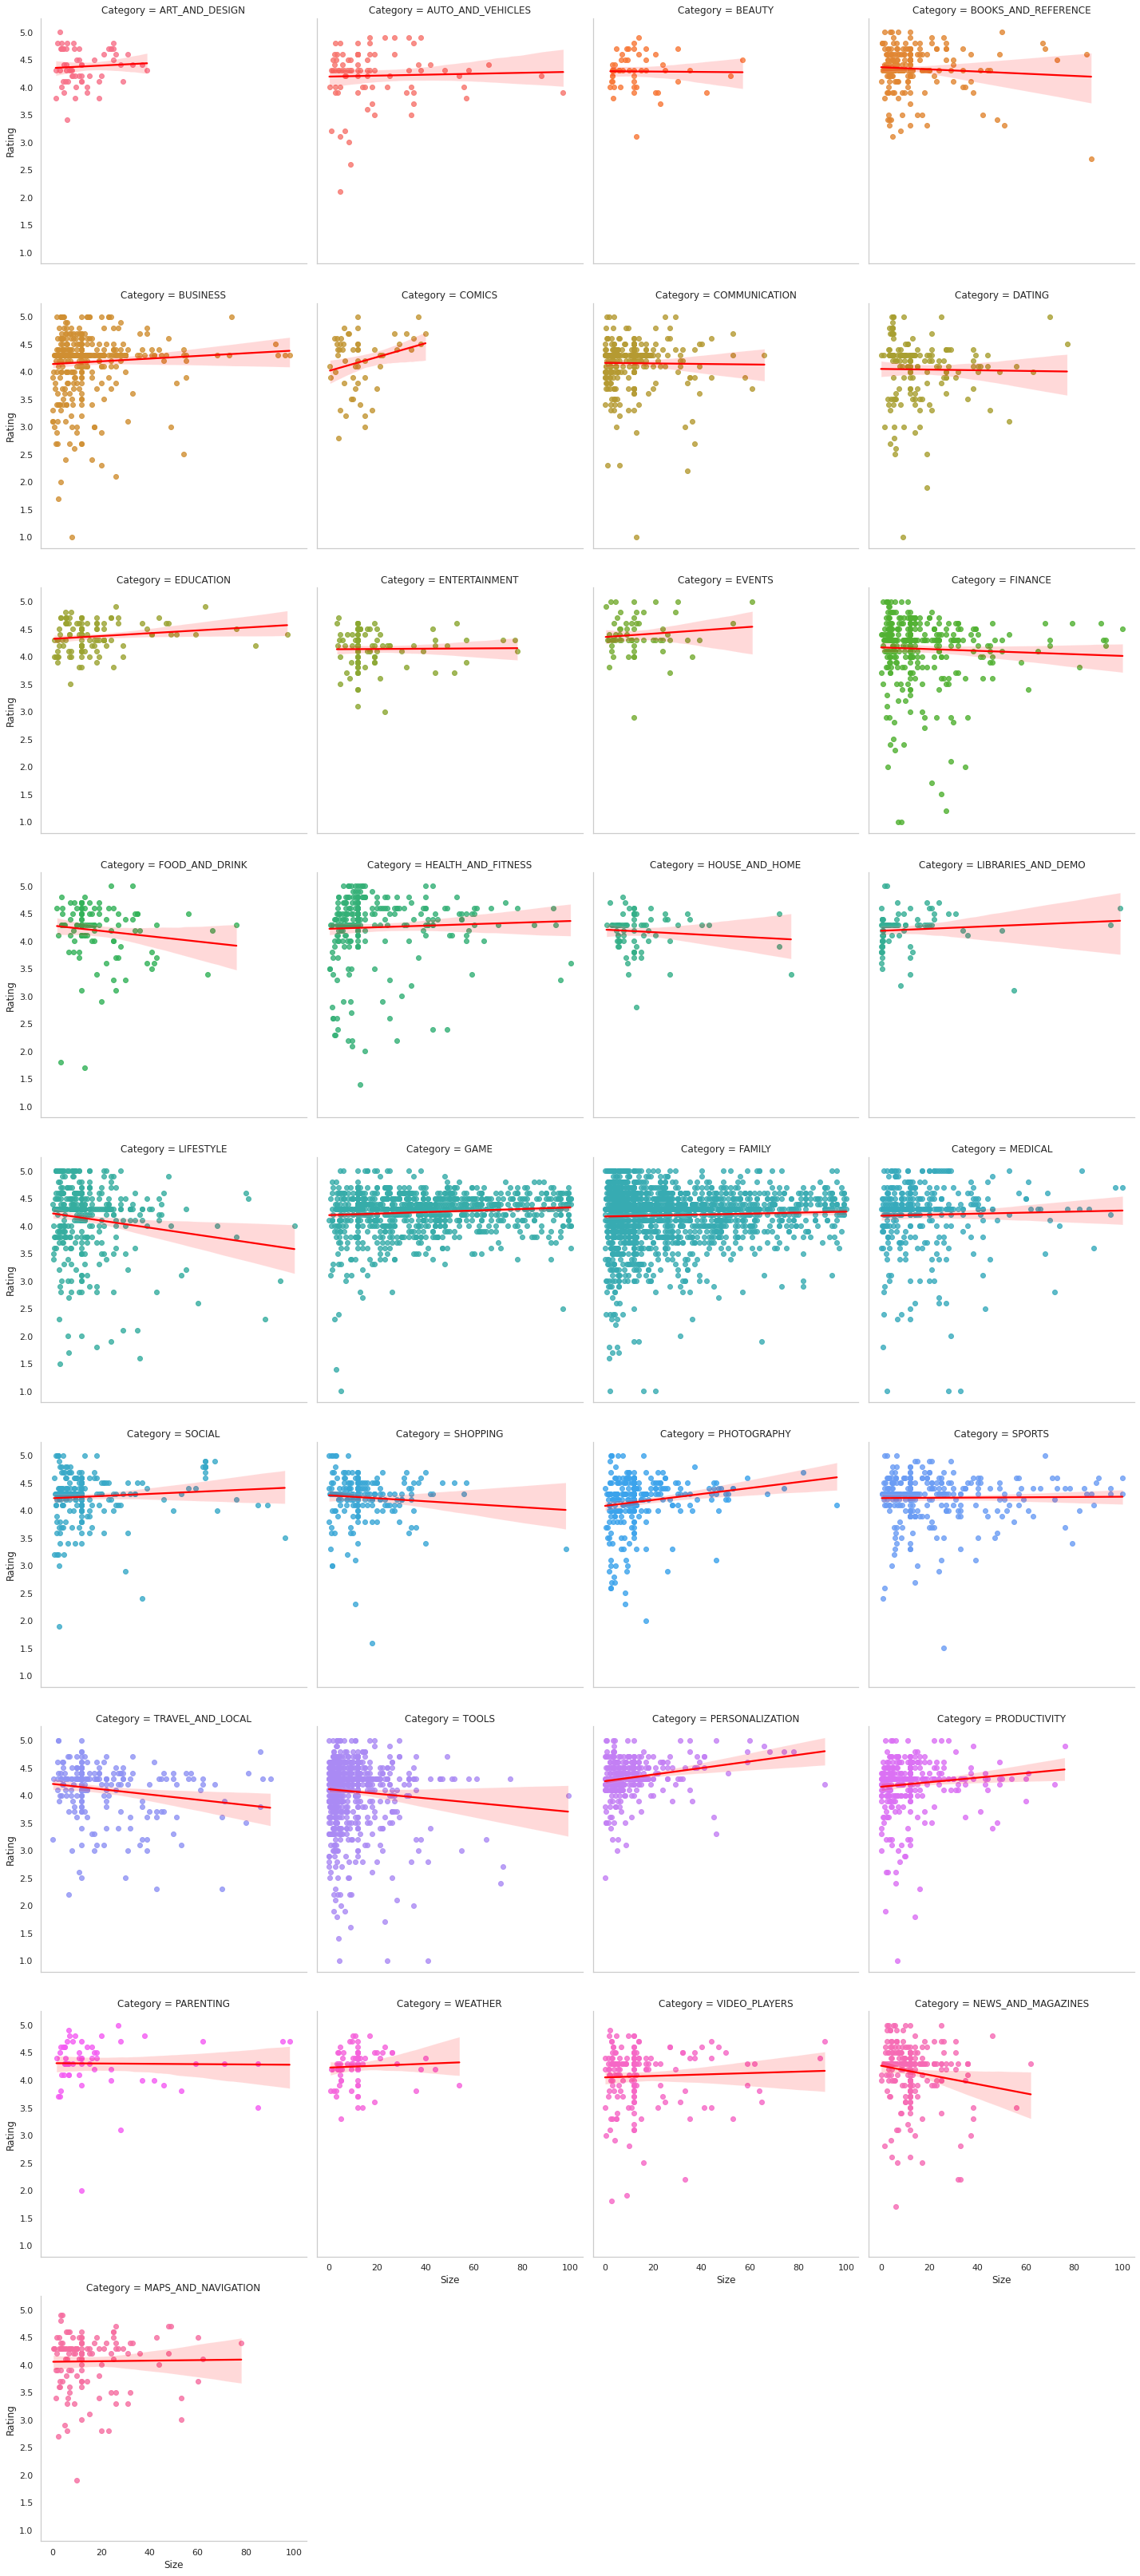

In [ ]:
# Size vs Rating for each Category
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(y='Rating',x='Size',data=Play_Store_df,col="Category", hue="Category",col_wrap=4,line_kws={'color': 'red'})

Based on category we can conclude the following:
- In case of large quantitiy of apps available specifically in the Family and Games category, there is no specific trend to Size vs Rating.
- Others have a noticable trend of increasing or decreasing slopes.

## Price v/s Rating

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.02, 'Rating vs Price of Apps')

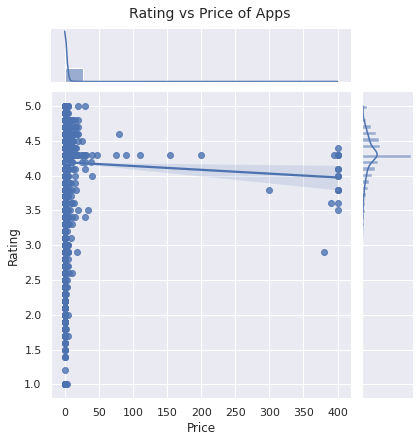

In [ ]:
# Relation between Rating & Price
sns.set_style("darkgrid")
ax = sns.jointplot(Play_Store_df['Price'], Play_Store_df['Rating'], kind="reg")
ax.fig.suptitle("Rating vs Price of Apps", y = 1.02, fontsize=14 )

As per the aove graph, the regression line shows a slight downward trend when price of the app increses but this is not because the high priced apps are poorly rated rather it is because there are very few high priced apps so we see a downward trend in regression line.

## Categories with Large size Apps

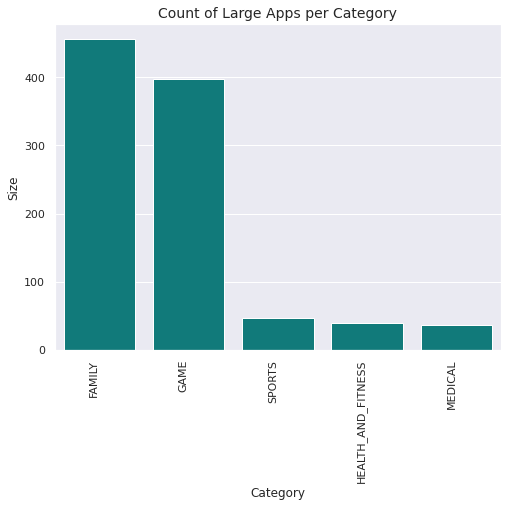

In [ ]:
# Large Sized Apps > 40 MB
Large_Apps = Play_Store_df[Play_Store_df["Size"]>40]
group_category = Large_Apps.groupby("Category")["Size"].count().sort_values(ascending=False).reset_index().head()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.set_style("darkgrid")
ax = sns.barplot(x="Category", y="Size", data=group_category, color = "darkcyan")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Large Apps per Category',size = 14)
plt.savefig("Count_large")

The Family Category has maximum number of Apps of Large Size followed by Games. But, the count of large sized apps drastically falls in other categories. 

## Top Content Rating Values

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


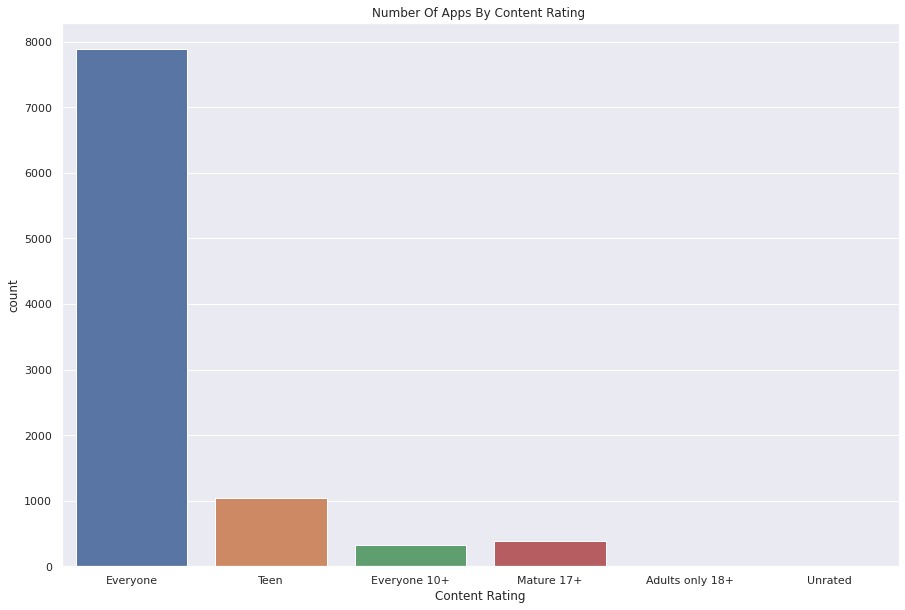

In [ ]:
ct_plot = sns.countplot(Play_Store_df["Content Rating"])
plt.title("Number Of Apps By Content Rating ")
sns.set (rc={'figure.figsize':(20,10)})
plt.show()


- Maximum numbers of apps on the playstore are for 'Everyone' category.
- As we can see there are some almost empty values like 'adults only 18+' and 'unrated'.
- So, here we're  going to drop these values as they won't help in the analysis. 

In [ ]:
# Droping "Unrated" values
no_recs = Play_Store_df[Play_Store_df['Content Rating']== "Unrated"]
Play_Store_df=Play_Store_df.drop(no_recs.index)

In [ ]:
# Droping "Adults only 18+" values
no_recs = Play_Store_df[Play_Store_df['Content Rating']=="Adults only 18+"]
Play_Store_df = Play_Store_df.drop(no_recs.index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


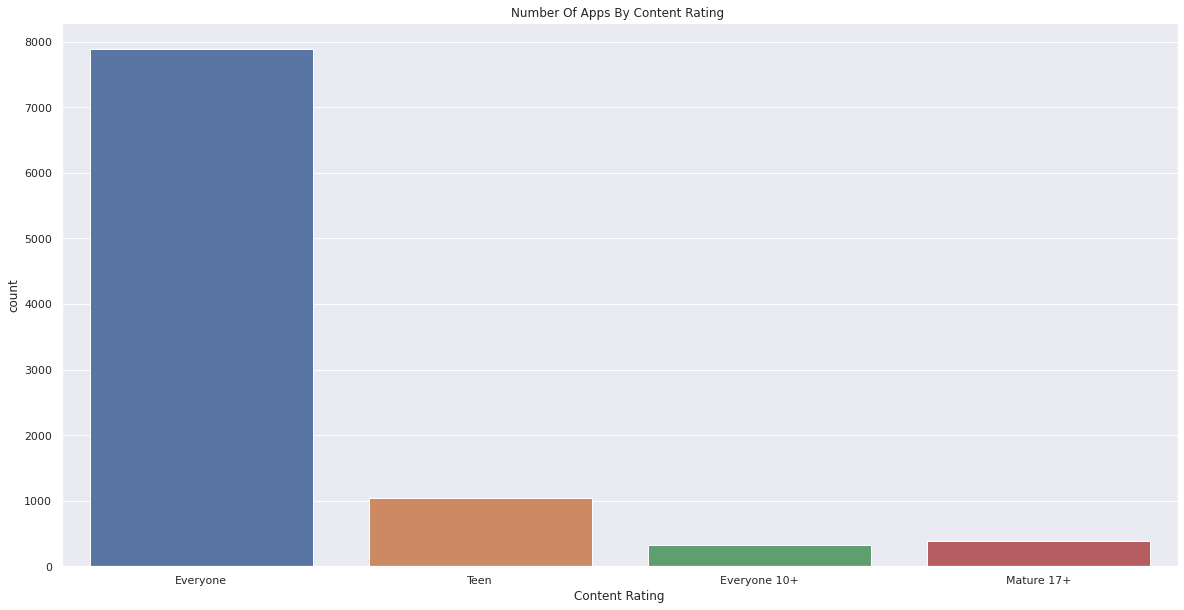

In [ ]:
ct_plot = sns.countplot(Play_Store_df["Content Rating"])
plt.title("Number Of Apps By Content Rating ")
sns.set (rc={'figure.figsize':(20,10)})
plt.show()

## Top Categories in Play Store

In [ ]:
#TOP Categories

Play_Store_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1827
GAME                    959
TOOLS                   824
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  324
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   54
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
x = Play_Store_df['Category'].value_counts()
y = Play_Store_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

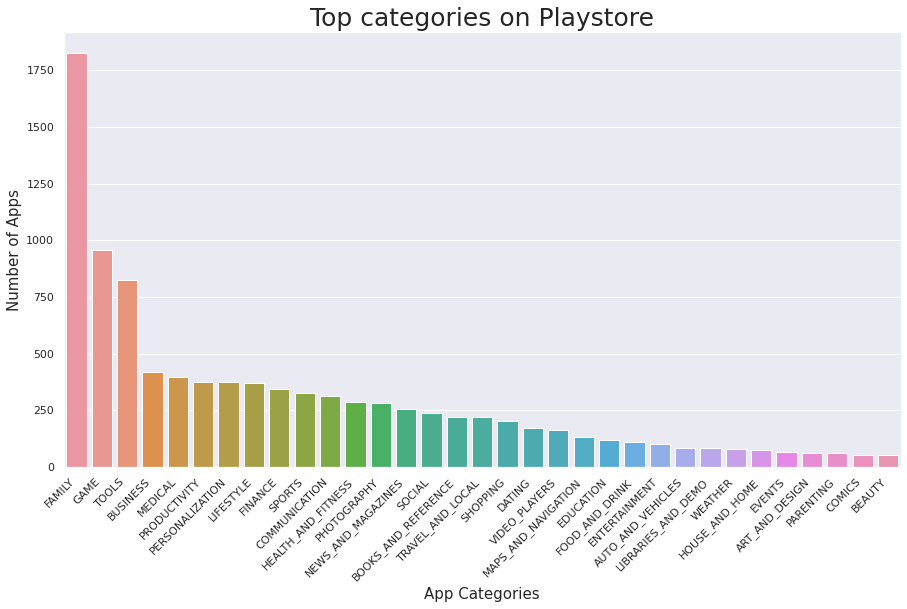

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(15,8))
plt.xlabel('App Categories', size=15)
plt.ylabel('Number of Apps', size=15)
graph = sns.barplot(y = x_list, x = y_list)
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

- Top 3 most populated categories are of Family, Games and Tools.
- Least number of Apps are in the Beauty category.

## Change in Count of Apps based on Category


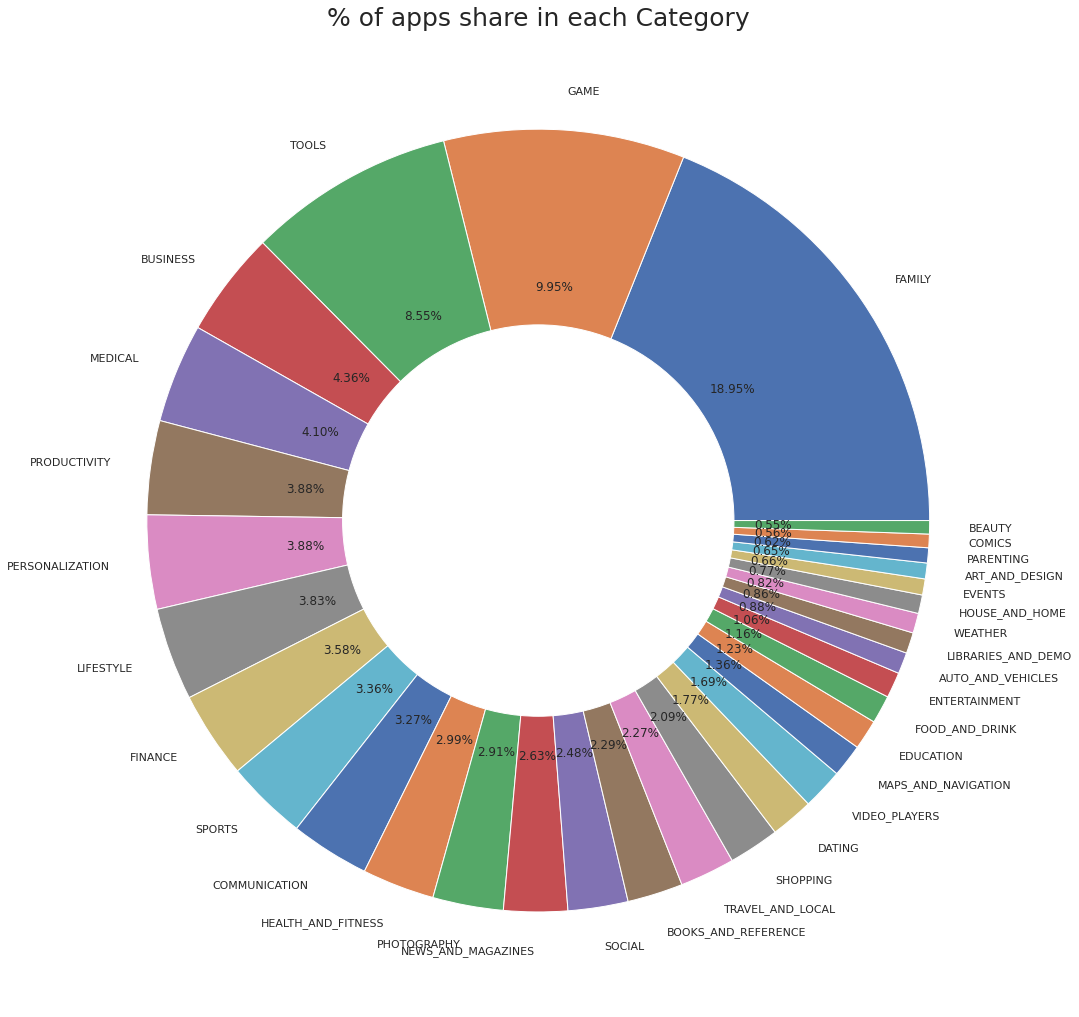

In [ ]:
# Percentage of apps belonging to each category in the playstore
plt.figure(figsize=(18,18))
plt.pie(Play_Store_df.Category.value_counts(), labels=Play_Store_df.Category.value_counts().index, autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.50, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('% of apps share in each Category', fontsize = 25)
plt.show()

- The results show that the Family Category has the highest number of availabe apps and also contain maximum large sized apps. 
- A similar patter of size to availability is for Games Category also, but that is where the trend ends.

## Category with Maximum Installs



Text(0.5, 1.0, 'Total app installs in each category')

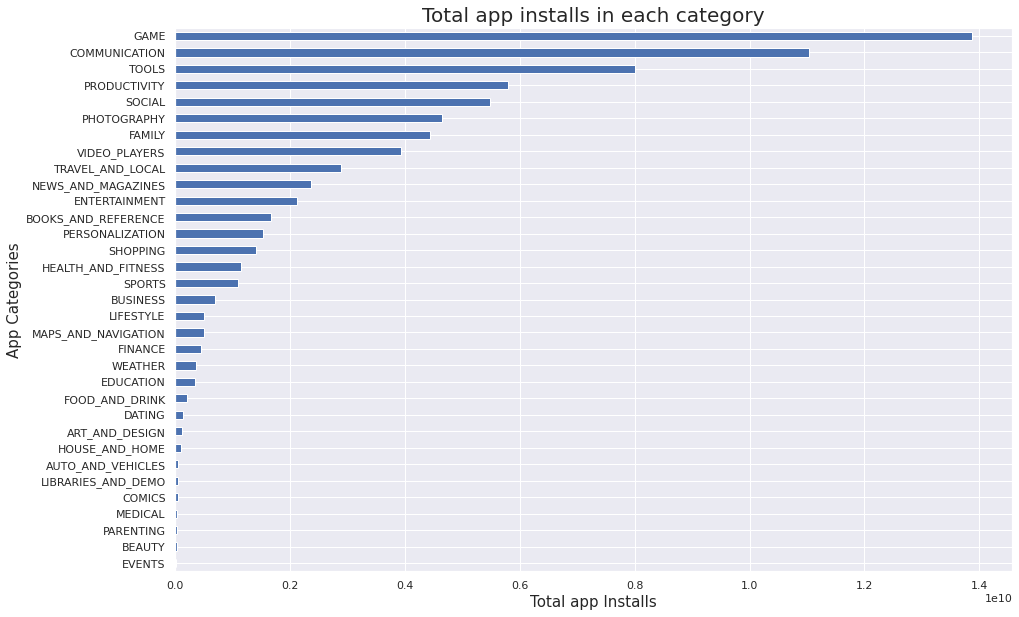

In [ ]:
# total app installs in each category of the play store

a = Play_Store_df.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'b', )
plt.ylabel('App Categories', fontsize = 15)
plt.xlabel('Total app Installs', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

- In terms of usage i.e. Installations, the Games Category tops the charts.
- Even though the Family Category has maximum available apps, Games has maximum installs.
- Communication which has only 3.26% apps out of the total apps, has second highest installs. 

## Top 10 Geners with Maximum Number of Apps

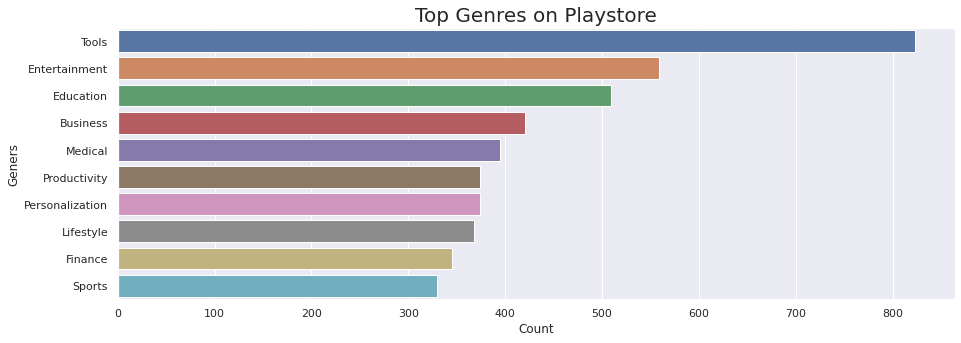

In [ ]:
y = Play_Store_df['Genres'].value_counts().index
x = Play_Store_df['Genres'].value_counts().head(10)
xsisG = []
ysisG = []
for i in range(len(x)):
    xsisG.append(x[i])
    ysisG.append(y[i])

plt.figure(figsize=(15,5))
plt.xlabel("Count")
plt.ylabel("Geners")

graph = sns.barplot(x = xsisG, y = ysisG,)
graph.set_title("Top Genres on Playstore", fontsize = 20);

## Apps with Maximum Reviews

Text(0.5, 1.0, 'Top 5 Apps with Maximum Reviews')

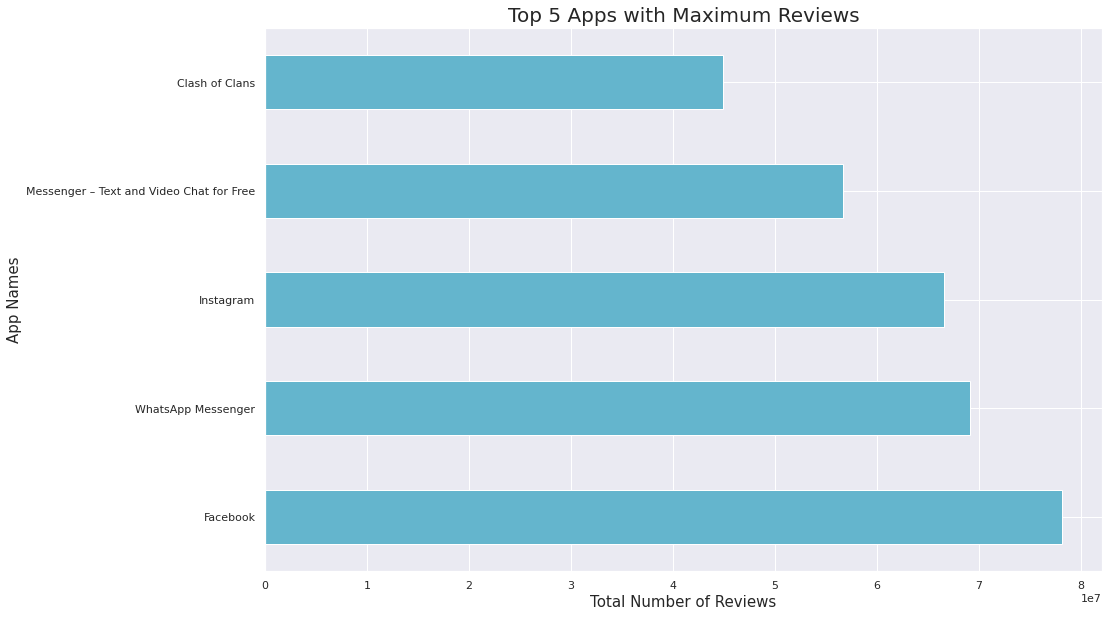

In [ ]:
#Apps with Maximum Reviews
b = Play_Store_df.groupby("App")['Reviews'].sum().sort_values(ascending = False).head()
b.plot.barh(figsize=(15,10), color = 'c' )
plt.ylabel('App Names', fontsize = 15)
plt.xlabel('Total Number of Reviews', fontsize = 15)
plt.xticks()
plt.title('Top 5 Apps with Maximum Reviews', fontsize = 20)

- A high concentration of reviews are for the Commuication Category.
- Considering the fact that Installs and Reviews are positively correlated, this outcome is to be expected following the Highest Installs graph above.

## Code for Top 10 Apps in any Category

In [ ]:
# Top 10 Apps in any Category

def Top_10_catergory(str):
    str = str.upper()
    top10 = Play_Store_df[Play_Store_df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(10,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 20)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')


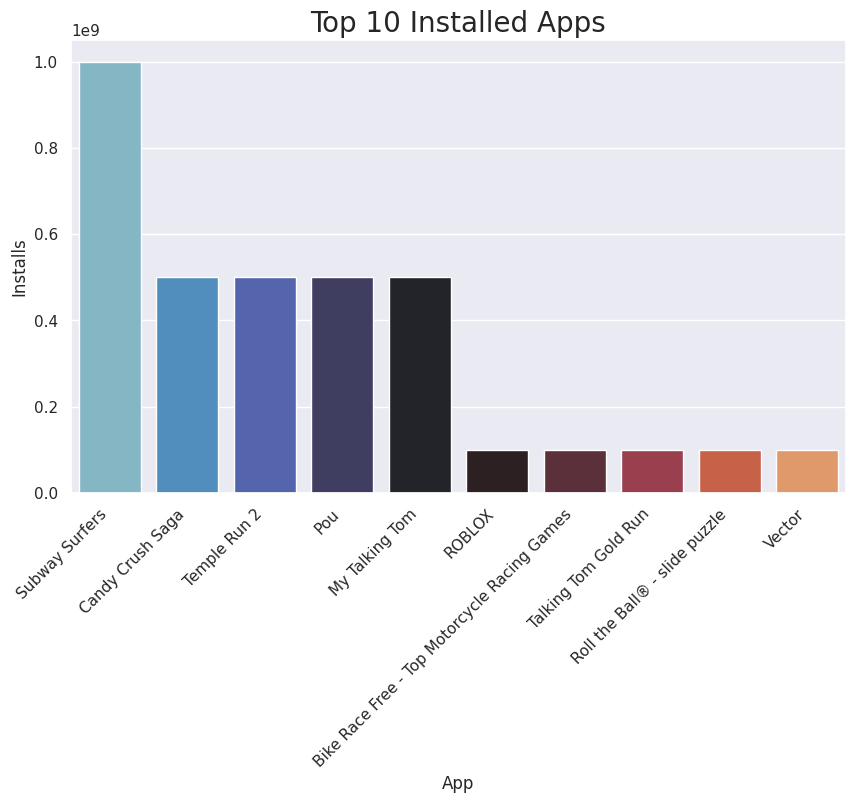

In [ ]:
Top_10_catergory('Game')

Using the above function we can check for all Categories.

## Ratio of Free to Paid Apps

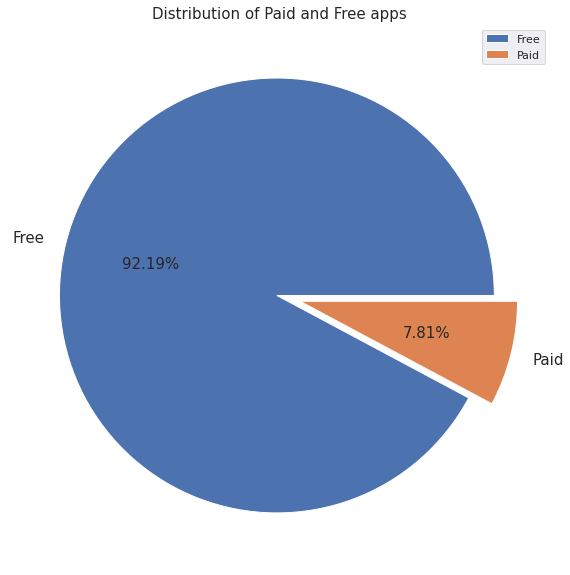

In [ ]:
data = Play_Store_df['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
colors = ["#00EE76","#7B8895"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

- Majority of Apps are free and from our data set 92% Apps are Free

## Top Free Apps Category

In [ ]:
#TOP Free APPS
PS_df_Free = Play_Store_df[Play_Store_df['Type'] == 'Free']

In [ ]:
PS_df_Top_Free = PS_df_Free[PS_df_Free['Installs'] == PS_df_Free['Installs'].max()]
Top_10_free_apps = PS_df_Top_Free.nlargest(10, 'Installs', keep = 'first')
Top_10_free_apps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update,Rating_Range
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,12.0,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,2018-08-03,Above Average
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,12.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018-08-01,Top Rated
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,12.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018-08-03,Top Rated
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,12.0,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018-08-01,Top Rated
340,Gmail,COMMUNICATION,4.3,4604324,12.0,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,2018-08-02,Top Rated
341,Hangouts,COMMUNICATION,4.0,3419249,12.0,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,2018-07-21,Top Rated
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,12.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018-08-03,Top Rated
865,Google Play Games,ENTERTAINMENT,4.3,7165362,12.0,1000000000,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,2018-07-16,Top Rated
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018-07-12,Top Rated
2544,Facebook,SOCIAL,4.1,78158306,12.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,2018-08-03,Top Rated


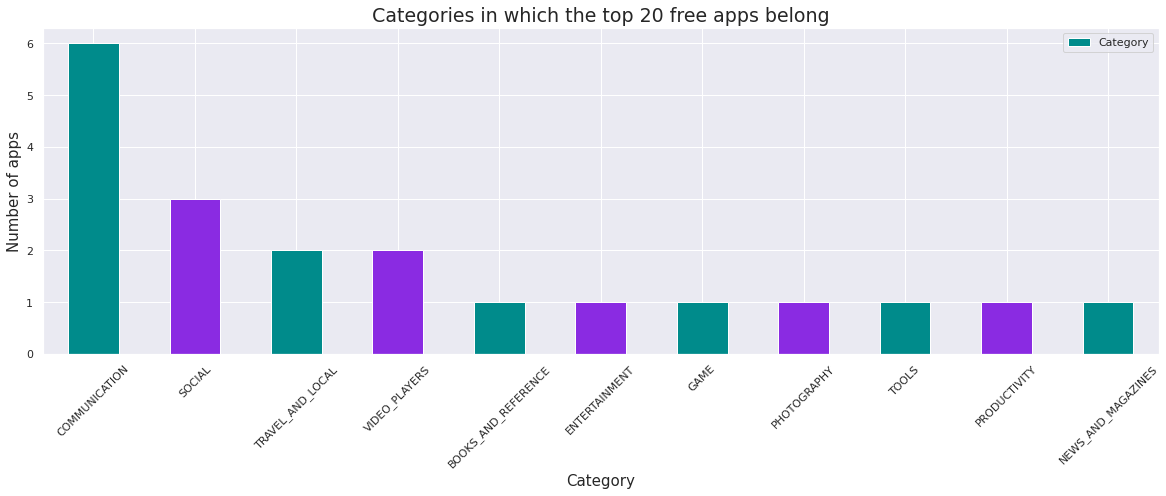

In [ ]:
# Categories in which the top 20 free apps belong to
PS_df_Top_Free['Category'].value_counts().plot.bar(figsize=(20,6), color= ('darkcyan','blueviolet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

- The maximunm number of Free Apps are in the Communication Category.
- Social is the second largest category for free apps.
- It can be said that Apps in the categories where their purpose is to connect people have majority free options. 
- Mobile Phones are essentially a means to connect and communicate with others. These apps simply provide a different UI to do the same task and hence should be free to use.

## Top Paid Apps Category

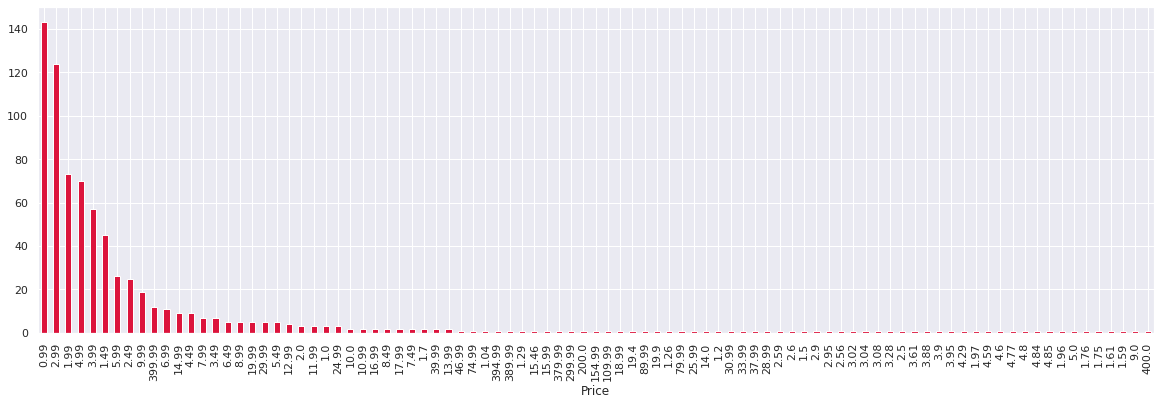

In [ ]:
# Creating a df containing only paid apps
paid_df=Play_Store_df[Play_Store_df['Type']=='Paid']
# Number of apps that can be installed at a particular price 

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'crimson')

- The variation in pricing of apps is wide spread in terms of cost to install.
- Some apps that charge a small amount whereas others charge a larger amount. The variation lies from USD 0.99 to USD 400.
- The apps that charges a lower installation fee will be installed by more number of people in general. Thus only installation count is an inacurate measure to determine revenue generation.
- A better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
This is given by:
Revenue generated through installs = (Number of installs)x(Price to install the app)

**Defining a new column Revenue in paid_df which gives the revenue generated by the app through installs alone.**

In [ ]:
# Creatng a new column 'Revenue' in paid_df
paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

<ipython-input-78-83cf897b5afd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update,Rating_Range,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up,2018-03-25,Top Rated,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up,2017-04-11,Top Rated,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,12.0,100000,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up,2018-07-05,Top Rated,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,12.0,10000,Paid,3.99,Mature 17+,Dating,"June 19, 2018",2.6.139,4.1 and up,2018-06-19,Top Rated,39900.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up,2017-10-25,Average,6990.0


In [ ]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update,Rating_Range,Revenue
2241,Minecraft,FAMILY,4.5,2376564,12.0,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,2018-07-24,Top Rated,69900000.0


In [ ]:
# Top 10 paid apps in the play store
top10paid_apps=paid_df.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

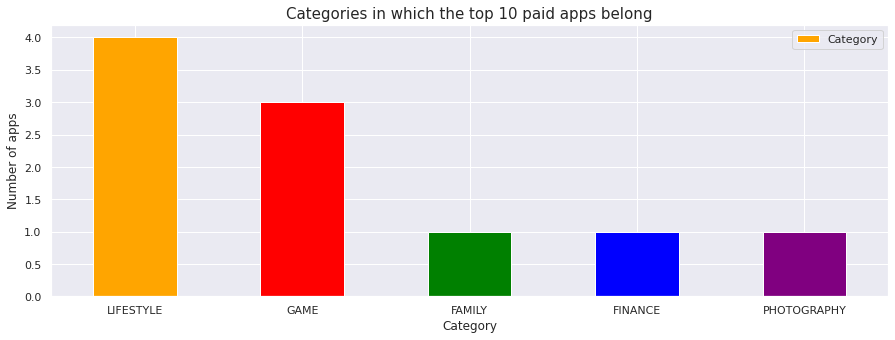

In [ ]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "blue", "purple"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


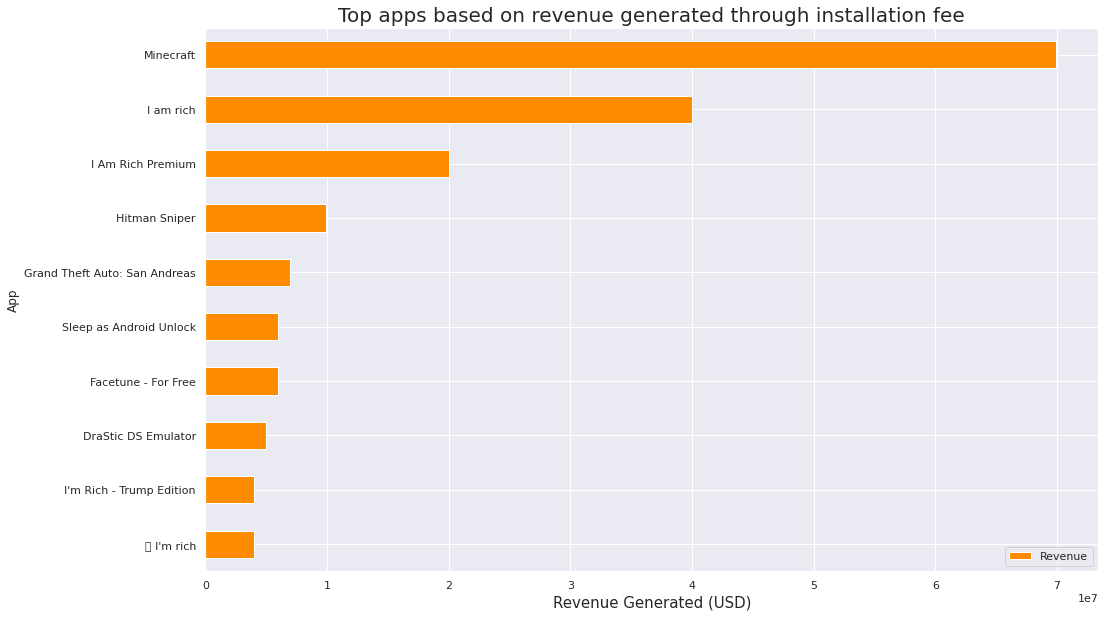

In [ ]:
# Top paid apps according to the revenue generated through installs alone
top10paid_apps.groupby('App')['Revenue'].mean().sort_values(ascending= True).plot.barh(figsize=(16,10), color='darkorange')
plt.xlabel('Revenue Generated (USD)', size=15)
plt.title('Top apps based on revenue generated through installation fee', size=20)
plt.legend()

Based on the above observations:
- The Highest earning APP is Minecraft from the FAMILY Category.
- The LIFESTYLE Category is the highest earning category.
- GAMES have the second most revenue earnings.

## App Pricing Trends

Text(0.5, 1.0, 'App pricing trend across popular categories')

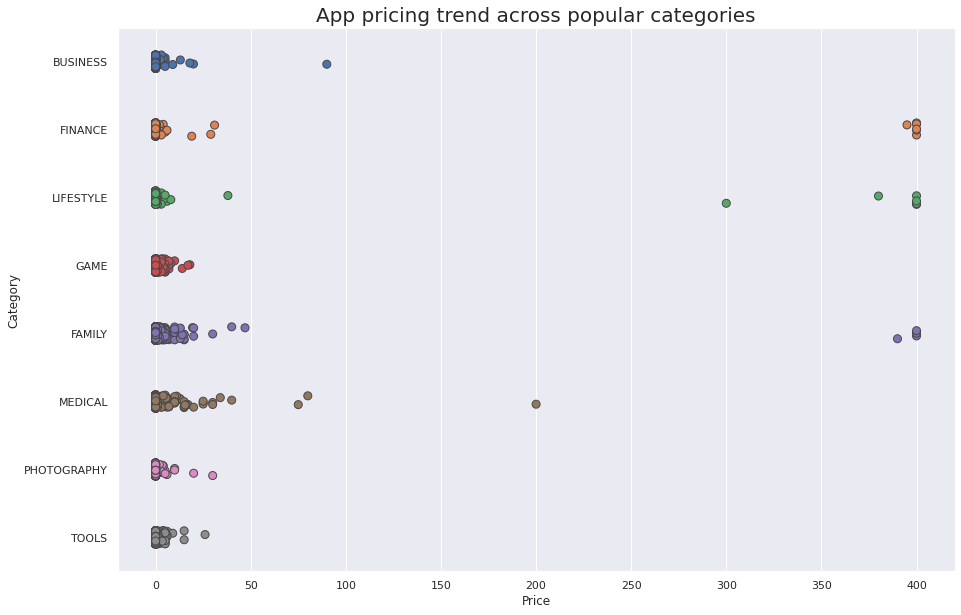

In [ ]:
plt.figure(figsize=(15,10))

# There are some popular app categories in given dataset
popular_app_cats = Play_Store_df[Play_Store_df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE','LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
cate_plot = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1 , size=8)
cate_plot.set_title('App pricing trend across popular categories',size=20)

Form the above plot we can say that the "MEDICAL" category and the "FAMILY"  category is more pricey than the others.

## Rating difference between Paid v/s Free

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


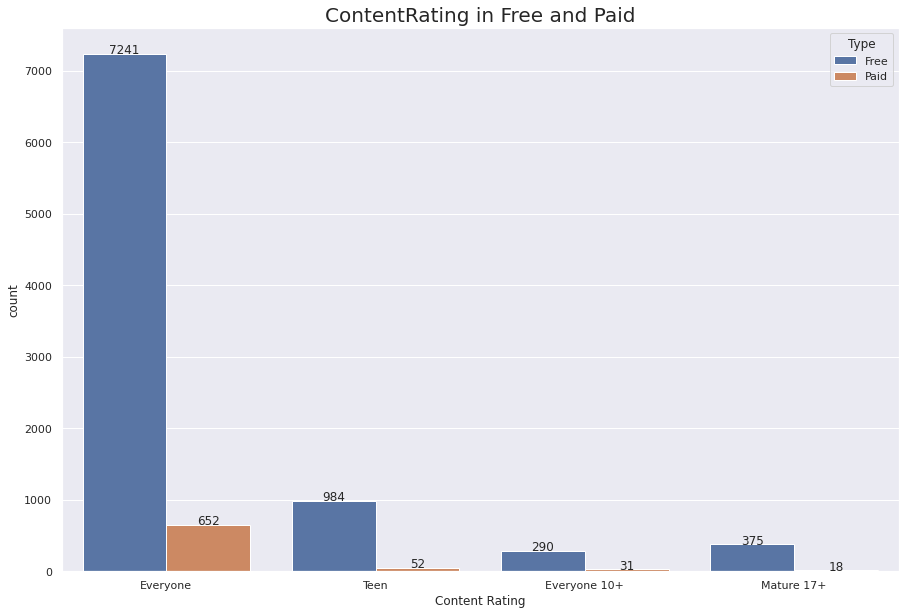

In [ ]:
plt.figure(figsize=(15,10))
rating_plt = sns.countplot(Play_Store_df['Content Rating'],hue=Play_Store_df['Type']);
plt.title("ContentRating in Free and Paid",size=20)

for p in rating_plt.patches:
    rating_plt.annotate(p.get_height(),(p.get_x() + p.get_width()/2,p.get_height()),ha='center',size= 12)
    
plt.show()

# **Exploring the User Review Data**